***                                Heart Disease Dignostic Analysis***

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Heart Disease data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.shape

(1025, 14)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
#checking null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

PERCENTAGE OF PEOPLE HAVING HEART DISEASE


In [10]:
target=df.groupby('target').size()
target

target
0    499
1    526
dtype: int64

In [11]:
#converting numerical data into categorical data
def heart_disease(row):
  if row==0:
    return 'NO'
  elif row==1:
    return 'YES'

In [12]:
#applying converted data into our dataset with new column - heart_disease
df['heart_disease']=df['target'].apply(heart_disease)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO


In [13]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,YES
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,NO
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,NO
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,YES
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,NO


In [14]:
heartdisease=df.groupby('heart_disease')['target'].count()
heartdisease

heart_disease
NO     499
YES    526
Name: target, dtype: int64

Data Visulizations


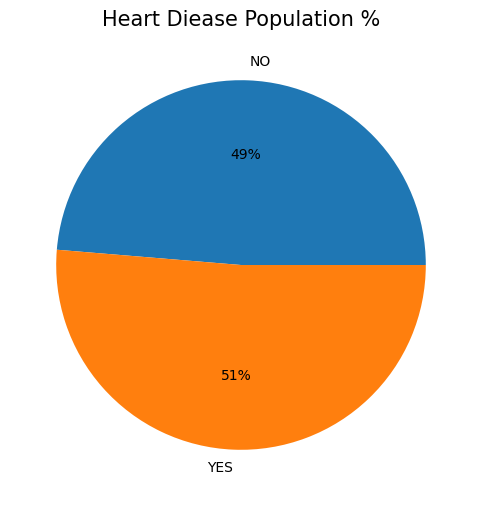

In [15]:
#piechart of heart disease population
plt.figure(figsize=(10,6))
plt.pie(heartdisease,labels=['NO','YES'],autopct='%0.0f%%')
plt.title('Heart Diease Population %',fontsize=15)
plt.show()


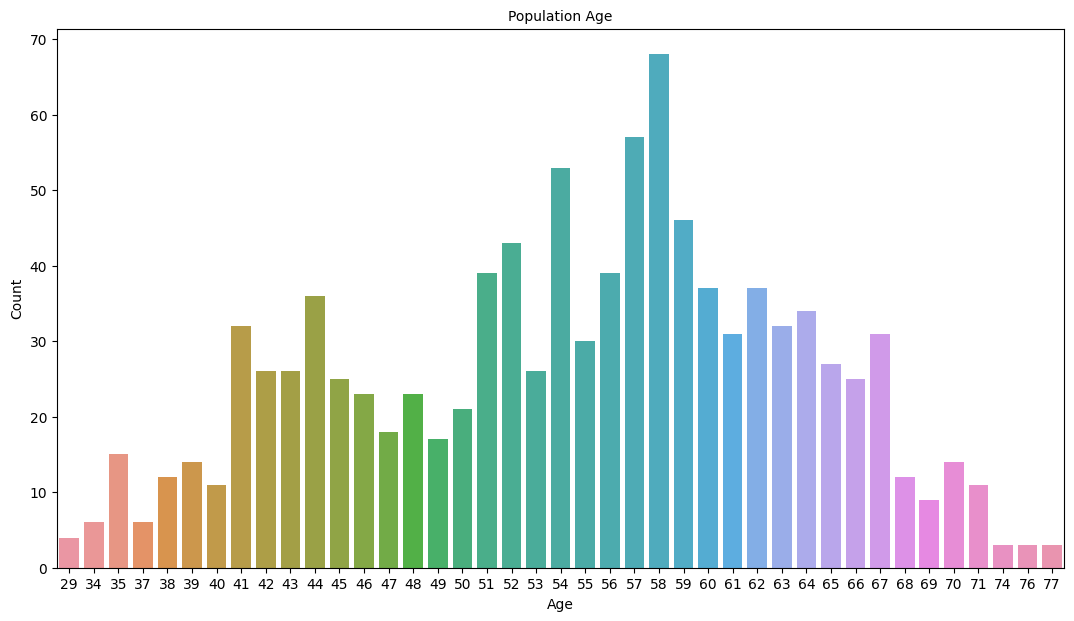

In [16]:
#population age using count plot
plt.figure(figsize=(13,7))
sns.countplot(x='age',data=df)
plt.title('Population Age',fontsize=10)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.show()

In [17]:
#statistical analysis
Min_age=df['age'].min()
Max_age=df['age'].max()
Mean_age=df['age'].mean()
print('Minimum Age:',Min_age)
print('Maximum Age:',Max_age)
print('Mean Age:',Mean_age)

Minimum Age: 29
Maximum Age: 77
Mean Age: 54.43414634146342


In [18]:
#categorical analysis
young=df[(df['age']>=29)&(df['age']<40)]
middle=df[(df['age']>=40)&(df['age']<55)]
elder=df[(df['age']>55)]
print('Young Ages:',len(young))
print('Middle Ages:',len(middle))
print('Elderly Ages:',len(elder))

Young Ages: 57
Middle Ages: 419
Elderly Ages: 519


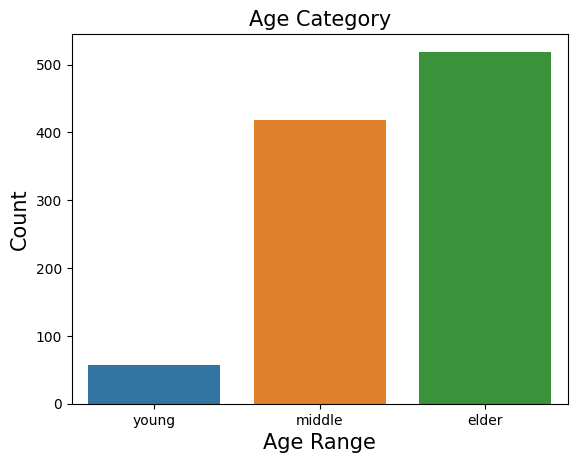

In [19]:
sns.barplot(x=['young','middle','elder'],y=[len(young),len(middle),len(elder)])
plt.title('Age Category', fontsize=15)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [20]:
#numerical data to categorical data
def gender(row):
  if row==1:
    return 'Male'
  elif row==0:
    return 'Female'

In [21]:
df['sex1']=df['sex'].apply(gender)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female


In [22]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,sex1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,YES,Male
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,NO,Male
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,NO,Male
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,YES,Female
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,NO,Male


In [23]:
#conversion of numerical data into categorical
def age_range(row):
  if row>=29 and row<40:
    return 'Young Age'
  elif row>=40 and row<55:
    return 'Middle Age'
  elif row>55:
    return 'Elder Age'


In [24]:
df['Age_Range']=df['age'].apply(age_range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female,Elder Age


In [25]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,sex1,Age_Range
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,YES,Male,Elder Age
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,NO,Male,Elder Age
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,NO,Male,Middle Age
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,YES,Female,Middle Age
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,NO,Male,Middle Age


In [26]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NO,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,NO,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,NO,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,NO,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,NO,Female,Elder Age
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,YES,Female,Elder Age
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,NO,Male,Elder Age
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,NO,Male,None
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,NO,Male,Middle Age
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,NO,Male,Middle Age


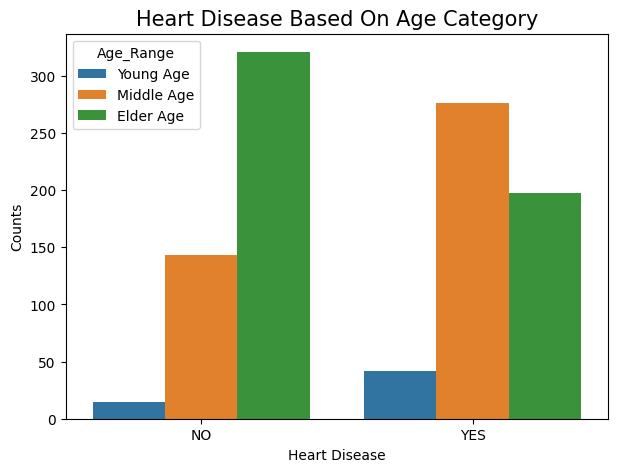

In [27]:
#count plot based on age category
plt.figure(figsize=(7,5))
hue_order=['Young Age','Middle Age','Elder Age']
sns.countplot(x='heart_disease',hue='Age_Range',data=df,order=['NO','YES'],hue_order=hue_order)
plt.title('Heart Disease Based On Age Category', fontsize=15)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel('Counts',fontsize=10)
plt.show()

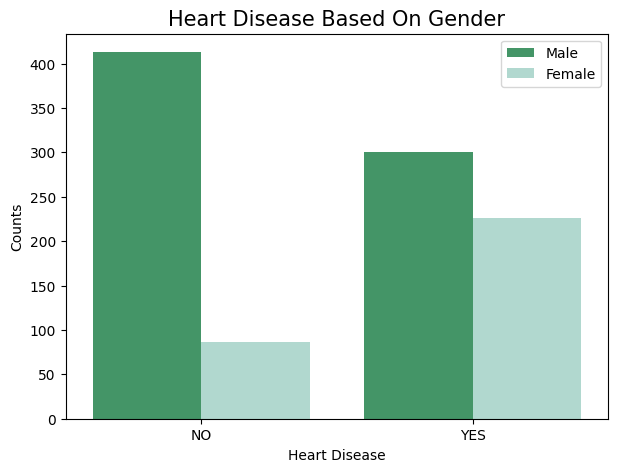

In [28]:
#count plot based on gender
plt.figure(figsize=(7,5))
sns.countplot(x=df['heart_disease'],hue='sex1',data=df,palette='BuGn_r')
plt.title('Heart Disease Based On Gender', fontsize=15)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel('Counts',fontsize=10)
plt.legend(labels=['Male','Female',])
plt.show()

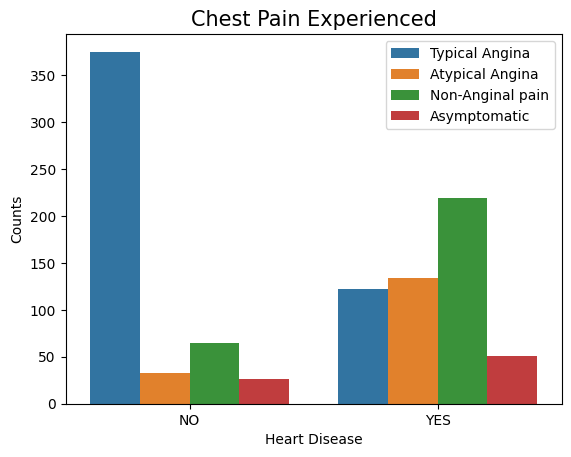

In [29]:
#countplot creation of chestpain(cp) experienced using matplotlib and seaborn
sns.countplot(x=df['heart_disease'],hue='cp',data=df,order=['NO','YES'])
plt.title('Chest Pain Experienced', fontsize=15)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel('Counts',fontsize=10)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

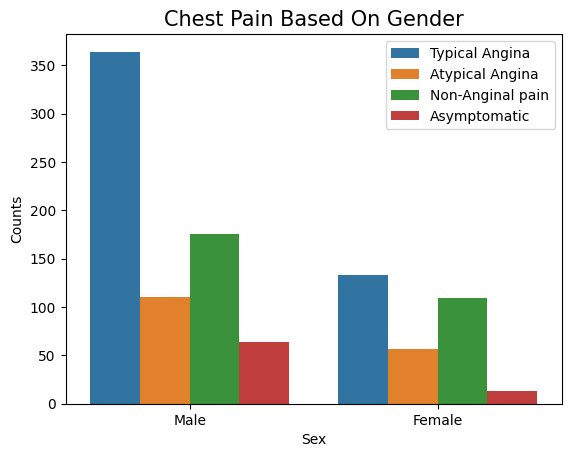

In [30]:
#COUNTPLOT CP BASED ON GENDER
sns.countplot(x=df['sex1'],hue='cp',data=df)
plt.title('Chest Pain Based On Gender', fontsize=15)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Counts',fontsize=10)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

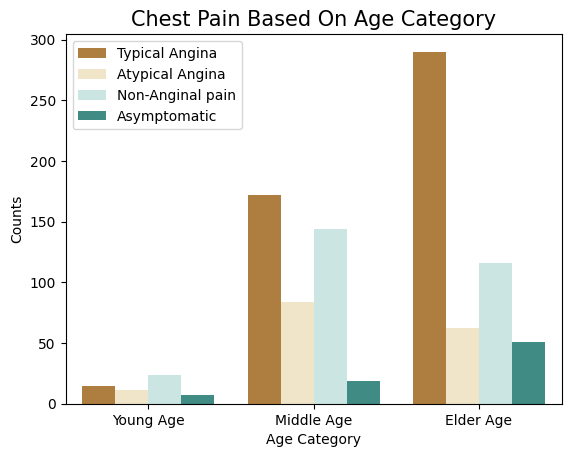

In [31]:
#cp based on age category
sns.countplot(x=df['Age_Range'],hue='cp',data=df,order=['Young Age','Middle Age','Elder Age'],palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=15)
plt.xlabel('Age Category', fontsize=10)
plt.ylabel('Counts',fontsize=10)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

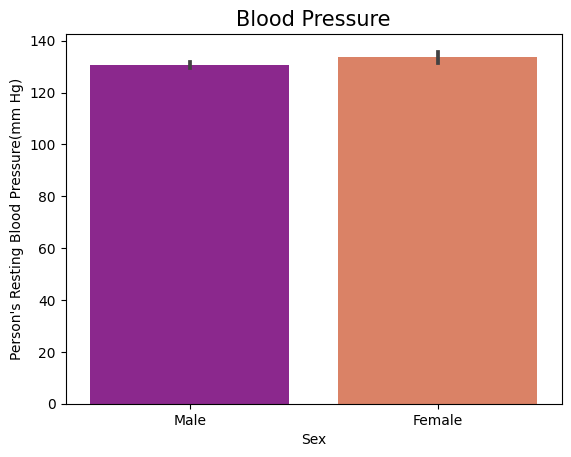

In [32]:
#barplot of Persons Resting Blood Pressure(mm Hg)
sns.barplot(x='sex1',y='trestbps',data=df,palette='plasma')
plt.title('Blood Pressure', fontsize=15)
plt.xlabel('Sex', fontsize=10)
plt.ylabel("Person's Resting Blood Pressure(mm Hg)",fontsize=10)
plt.show()

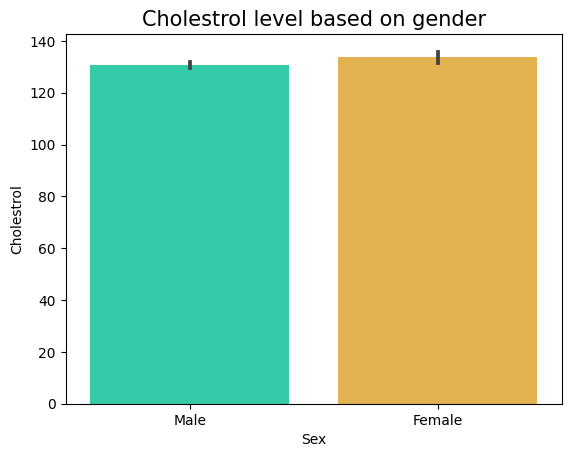

In [33]:
#bar plot of cholestrol level based on gender
sns.barplot(x='sex1',y='trestbps',data=df,palette='turbo')
plt.title('Cholestrol level based on gender', fontsize=15)
plt.xlabel('Sex', fontsize=10)
plt.ylabel("Cholestrol",fontsize=10)
plt.show()

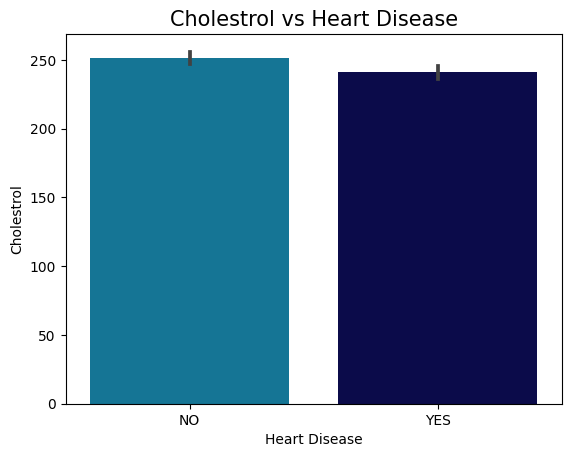

In [34]:
#barplot cholestrol vs heart disease
sns.barplot(x='heart_disease',y='chol',data=df,palette='ocean_r')
plt.title('Cholestrol vs Heart Disease', fontsize=15)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel("Cholestrol",fontsize=10)
plt.show()

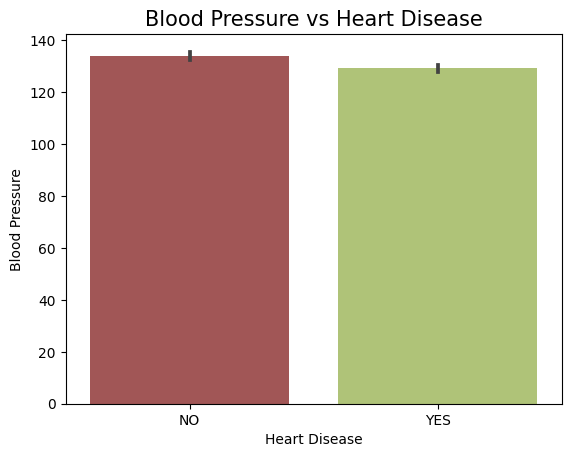

In [35]:
#blood pressure vs heart disease
sns.barplot(x='heart_disease',y='trestbps',data=df,palette='tab20b_r')
plt.title('Blood Pressure vs Heart Disease', fontsize=15)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel("Blood Pressure",fontsize=10)
plt.show()

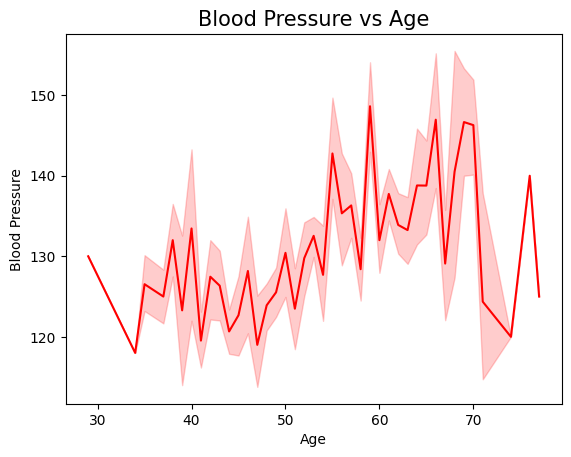

In [36]:
#line plot - Blood Pressure vs Age
sns.lineplot(x='age',y='trestbps',data=df,color='r')
plt.title('Blood Pressure vs Age', fontsize=15)
plt.xlabel('Age', fontsize=10)
plt.ylabel("Blood Pressure",fontsize=10)
plt.show()

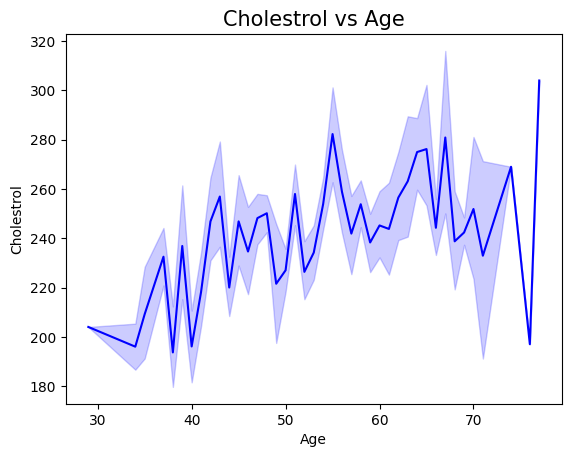

In [37]:
#line plot - Cholestrol vs Age
sns.lineplot(x='age',y='chol',data=df,color='b')
plt.title('Cholestrol vs Age', fontsize=15)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Cholestrol',fontsize=10)
plt.show()

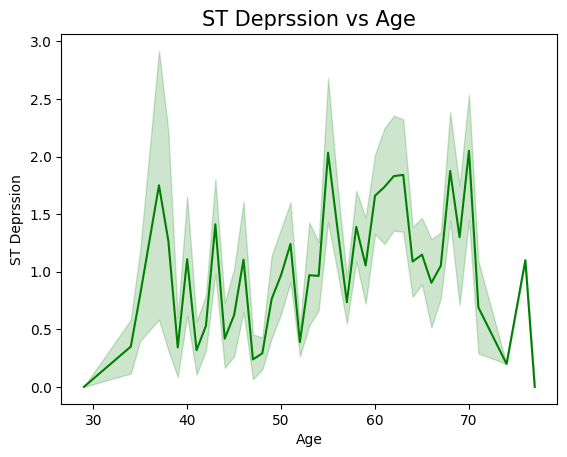

In [38]:
#lineplot of ST Deprssion vs Age
sns.lineplot(x='age',y='oldpeak',data=df,color='g')
plt.title('ST Deprssion vs Age', fontsize=15)
plt.xlabel('Age', fontsize=10)
plt.ylabel('ST Deprssion',fontsize=10)
plt.show()

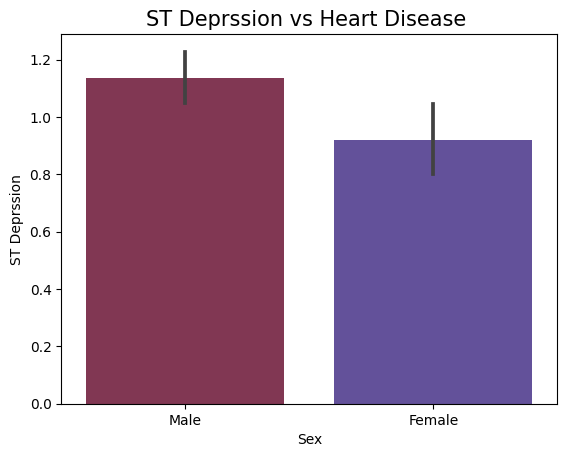

In [39]:
#barplot of ST Deprssion vs Heart Disease
sns.barplot(x='sex1',y='oldpeak',data=df,palette='twilight_r')
plt.title('ST Deprssion vs Heart Disease ', fontsize=15)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('ST Deprssion',fontsize=10)
plt.show()

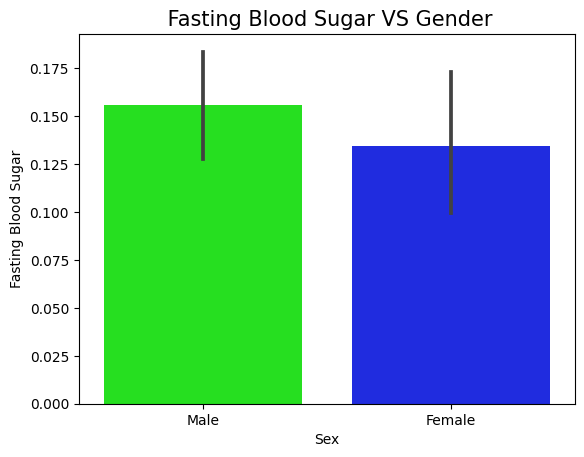

In [40]:
#barplot of fasting blood sugar vs gender
sns.barplot(x='sex1',y='fbs',data=df,palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=15)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Fasting Blood Sugar',fontsize=10)
plt.show()

<ipython-input-41-0035714bfdbd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=3)


<Axes: >

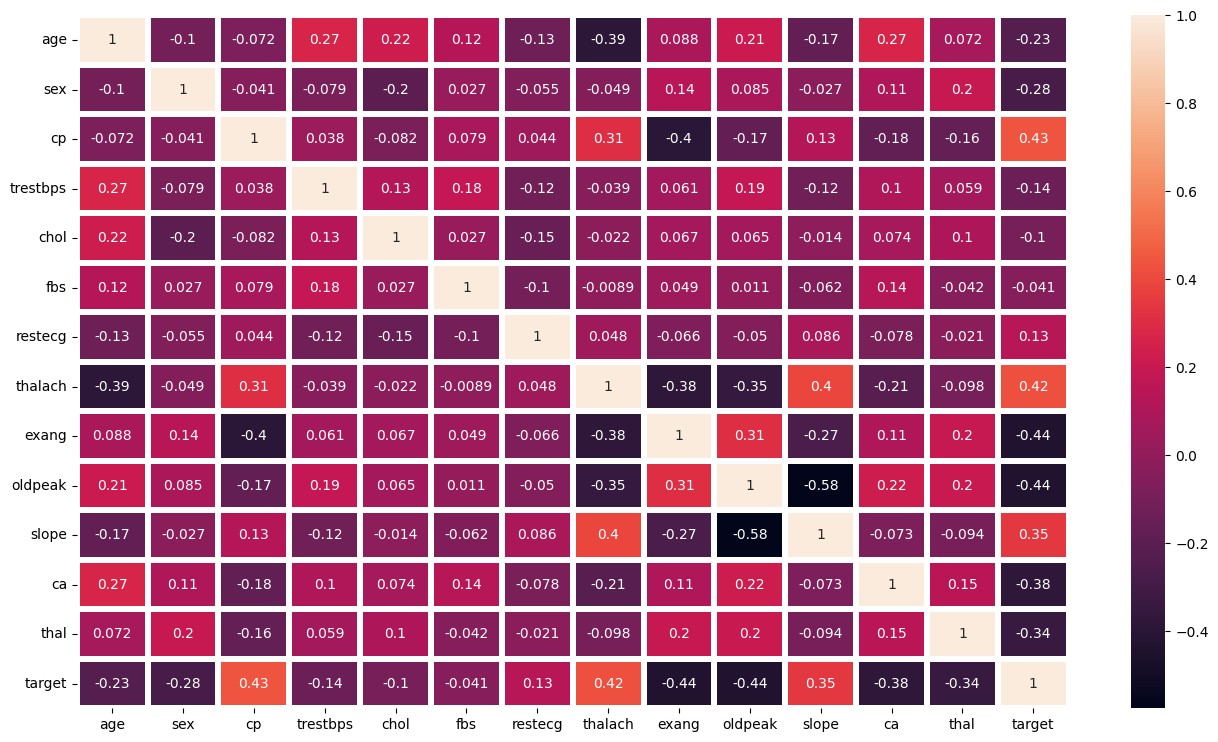

In [41]:
#heatmap using seaborn
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,linewidths=3)